In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# MSE
def mean_squared_error(y_pred, y_true):
  n = len(y_true)
  mse = sum((y_true[i] - y_pred[i]) ** 2 for i in range(n)) / n

  return mse

In [4]:
# MAE
def mean_absolute_error(y_pred, y_true):
  n = len(y_true)
  mae = sum(abs(y_true[i] - y_pred[i]) for i in range(n)) / n

  return mae

In [5]:
# Accuracy
def accuracy(y_pred, y_true):
  n = len(y_true)
  correct = 0

  for i in range(n):
    if y_pred[i] == y_true[i]:
      correct += 1

  accuracy = correct / n

  return accuracy

In [6]:
# F1-score
def f1_score(y_pred, y_true):
  n = len(y_true)

  true_positive = sum(y_true[i] == 1 and y_pred[i] == 1 for i in range(len(y_true)))
  false_positive = sum(y_true[i] == 0 and y_pred[i] == 1 for i in range(len(y_true)))
  false_negative = sum(y_true[i] == 1 and y_pred[i] == 0 for i in range(len(y_true)))

  precision = true_positive / (true_positive + false_positive)
  recall = true_positive / (true_positive + false_negative)

  f1 = 2 * (precision * recall) / (precision + recall)

  return f1

In [7]:
# Проверка
true = np.array([3, 1, 5, 7, 2])
pred = np.array([3.5, 0.98, 5, 5, 1.8])

print(f'MSE: {mean_squared_error(pred,true)}, MAE: {mean_absolute_error(pred,true)}')

MSE: 0.85808, MAE: 0.5439999999999999


In [9]:
# Проверка классификации
true = np.array([1, 1, 1, 0, 0, 1])
pred = np.array([1, 1, 0, 0, 0, 1])
print(f'Accuracy: {accuracy(pred, true)}, F1-score: {f1_score(pred, true)}')

Accuracy: 0.8333333333333334, F1-score: 0.8571428571428571


In [103]:
# Linear regression
def linear_regression(X, y, epochs = 1000, learning_rate = 0.01):
  n = len(X)
  w0, w1 = 0,0
  loss_list = []

  for _ in range(epochs):
    y_pred = w0 + w1*X

    dw0 = (-2/n)*sum(y-y_pred)
    dw1 = (-2/n)*sum((y-y_pred)*X)

    w0 = w0 - learning_rate * dw0
    w1 = w1 - learning_rate * dw1

    loss_list.append(mean_squared_error(y_pred, y))


  return w0, w1, loss_list, epochs

In [79]:
X = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])
w0, w1, loss_list, epochs = linear_regression(X, y)

print(w0+w1*6)
print(w0+w1*7)
print(w0+w1*8)
print(w0+w1*100)
w0,w1

7.015032076809709
8.021322483816004
9.027612890822297
101.60633033540138


(0.9772896347719431, 1.0062904070062944)

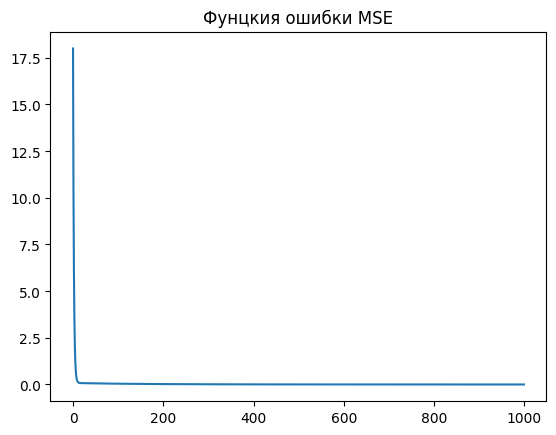

In [65]:
plt.plot(range(epochs), loss_list)
plt.title('Фунцкия ошибки MSE')
plt.show()

In [88]:
X_test = np.array(range(27))
y_pred = w0 + w1*X_test
y_pred

array([ 0.97728963,  1.98358004,  2.98987045,  3.99616086,  5.00245126,
        6.00874167,  7.01503208,  8.02132248,  9.02761289, 10.0339033 ,
       11.0401937 , 12.04648411, 13.05277452, 14.05906493, 15.06535533,
       16.07164574, 17.07793615, 18.08422655, 19.09051696, 20.09680737,
       21.10309777, 22.10938818, 23.11567859, 24.121969  , 25.1282594 ,
       26.13454981, 27.14084022])

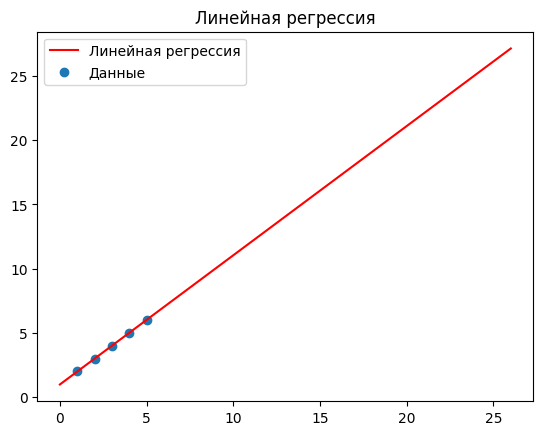

In [90]:
plt.plot(X_test, y_pred, color='red', label='Линейная регрессия')
plt.scatter(X, y, label='Данные')

plt.title("Линейная регрессия")
plt.legend()

plt.show()

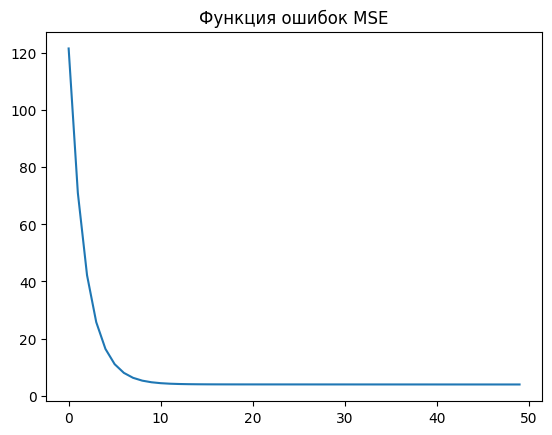

In [143]:
# Даём другие данные
x = np.array([2, 1, 8, 13, 14, 18, 17, 3, 9, 9])
y = np.array([1, 5, 10, 11, 14, 16, 19, 5, 7, 9])
w0, w1, loss_list, epochs = linear_regression(x,y, 50, 0.001)

plt.plot(range(epochs), loss_list)
plt.title('Функция ошибок MSE')
plt.show()

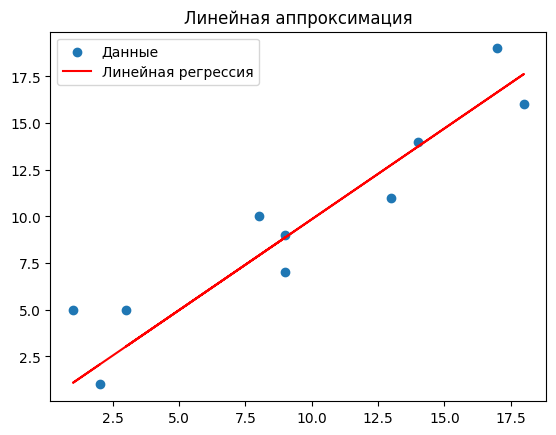

In [144]:
y_pred = w0 + w1*x
plt.scatter(x,y, label = 'Данные')
plt.plot(x,y_pred, 'red', label = 'Линейная регрессия')
plt.title('Линейная аппроксимация')
plt.legend()
plt.show()